## This Notebook - Goals - FOR EDINA

**Aim:** <br>
The purpose of this Notebook is to introduce the user to <code>ridge_map</code>, a geospatial python library pre-installed in the Noteable Geospatial Notebook. It illustates the main features and advantages of this library when visualizing elevation data.

**Target audience:** <br>
This Notebook is primarily aimed at a user interested in geospatial data analysis. Academics and students in geosciences and other STEM degrees could benefit from the use of <code>ridge_map</code>, either to practise geospatial data visualization skills or to specifically plot elevation maps.

**Motivation:** <br>
The motivation behind creating this exemplar is to promote Noteable by showing the large variety of libraries that are pre-installed in the Geospatial Notebook.

**Noteable features to exploit:** <br>
This Notebook focuses on one specific library included within the Geospatial Notebook called <code>ridge_map</code> along with some of the standard python libraries such as <code>numpy</code> and <code>matplotlib</code>.

**How are the features exploited:** <br>
This Notebook uses <code>ridge_map</code> as the main data visualization library and provides examples of its usage that can be used as templates by the viewer.

<hr>

# Plotting elevation data using ridge_map

[Ridge_map](https://github.com/ColCarroll/ridge_map) is a python library aimed at creating ridge maps of elevaton data which comes from NASA's Shuttle Radar Topography Mission (SRTM), high resolution topographic data collected in 2000 and released in 2015. SRTM data are sampled at a resolution of 1 arc-second (about 30 meters) and provided to <code>ridge_map</code> via the python package SRTM.py, which is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0) <br>

This Notebook illustrates how to create ridge maps of Great Britain and the Lake District. Great Britain was chosen to show the large scale maps this library can achieve in comparison to others where the data is split into tiles. This usually results in many separate smaller files that need to be pre-processed. Substantially larger polygons can be selected, although SRTM is not available for latitudes outside of the range N 60° - S 60°. The Lake District was chosen so that the image can be reasonably compared to maps plotted using other libraries, which can be viewed in the Exemplars on <code>Rasterio</code> and <code>EarthPy</code>. Of course, you can select a bounding box of your area of interest, for example by obtaining the points of a polygon using [bboxfinder](http://bboxfinder.com/). Once you load in the elevation data from SRTM, you can preprocess it to automatically detect lakes, rivers, and oceans, and scale the elevations. <br>

**Notebook contents:**
- Installing ridge_map *(delete once Geospatial Notebook is updated)*
- Importing the necessary libraries
- Creating custom colourmap to reflect typical terrain colours
- Ridge map of Great Britain
- Ridge map of the Lake District
- Customizing the colourbars of the maps

In [1]:
# Once ridge_map and earthpy are in the live GeoNotebook, delete this cell
!pip install ridge_map --quiet

In [1]:
# Import all the necessary libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from ridge_map import RidgeMap

# Hide warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set up function to customize the chosen matplotlib colormap
def truncate_colormap(cmap, minval, maxval, n=100):
    cmapsample = cmap(np.linspace(minval, maxval, n)) #Sample the original colormap at n points between minval and maxval
    new_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
           'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
            cmapsample)  #Create new colormap using the range that was sampled in cmapsample
    return new_cmap #Return new colormap that can be called upon with get_cmap

# See: https://stackoverflow.com/questions/18926031/how-to-extract-a-subset-of-a-colormap-as-a-new-colormap-in-matplotlib

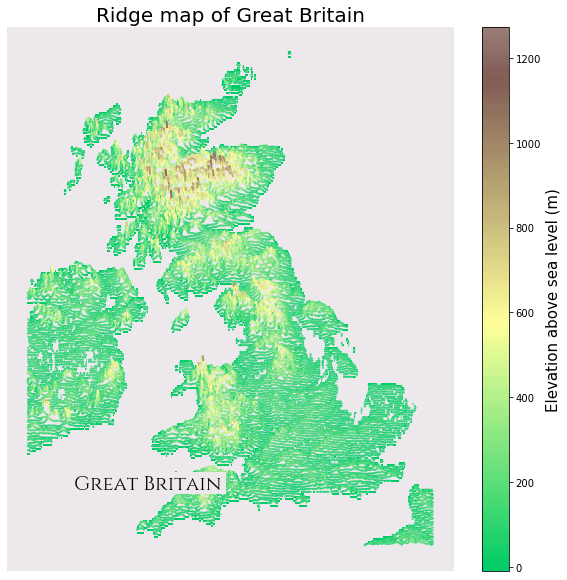

In [3]:
# Identify the points of the polygon of Great Britain from http://bboxfinder.com/
polygon = (-8.657227,49.761777,2.241211,59.625348)

# Get the elevation values for each data point within the polygon
rm = RidgeMap(polygon)
values = rm.get_elevation_data(num_lines=220, elevation_pts=550)

# Specify the colormap segment for this example - range from deep green to darkbrown
cmap = plt.get_cmap('terrain') # Colormap ranging darkblue-green-yellow-brown-white
new_cmap = truncate_colormap(cmap, 0.25, 0.8) # Cutting out darkblue and white ends

# Plot the ridge map
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
rm.plot_map(values=rm.preprocess(values=values, lake_flatness=4, water_ntile=30, vertical_ratio=70),
            ax=ax,
            label='Great Britain', #Label the map with the name of the area
            label_x=0.15, #Set location of label
            label_size=20, #Set size of the label
            linewidth=2, #Set the thickness of the lines
            line_color = plt.get_cmap(new_cmap), #Set colormap of the lines
            kind='elevation')

# Add colorbar and customize the map
norm = matplotlib.colors.Normalize(vmin=np.nanmin(values), vmax=np.nanmax(values))
sm = plt.cm.ScalarMappable(norm = norm, cmap=new_cmap)
plt.colorbar(sm).set_label(label = 'Elevation above sea level (m)', size=15)

plt.title("Ridge map of Great Britain", size=20)
plt.show()

# Save the figure - uncomment code below
#plt.savefig("GB_ridgemap.png")

RemoteDisconnected: Remote end closed connection without response

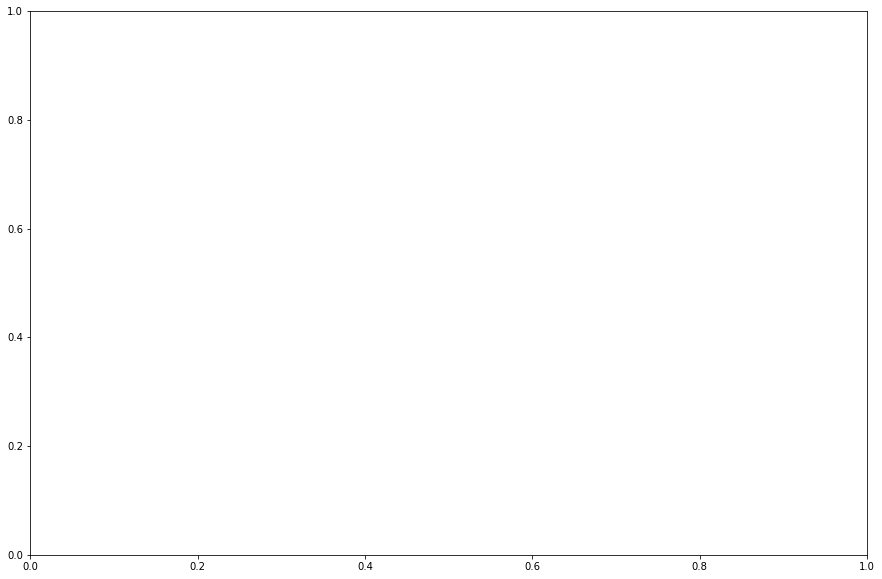

In [4]:
#Set up the figure
fig, ax = plt.subplots(figsize=(15, 10))

# Identify the points of the polygon of the Lake District
polygon = (-3.433415,54.197751,-2.678271,54.648501)

# Get the elevation values for each data point within the polygon
rm = RidgeMap(polygon)
values = rm.get_elevation_data(num_lines=220, elevation_pts=550)

# Specify the colormap segment for this example - range from deep green to darkbrown
cmap = plt.get_cmap('terrain') # Colormap ranging darkblue-green-yellow-brown-white
new_cmap = truncate_colormap(cmap, 0.25, 0.8) # Cutting out darkblue and white ends

# Plot the ridge map
rm.plot_map(values=rm.preprocess(values=values, lake_flatness=4, water_ntile=25, vertical_ratio=100),
            label='Lake District', #Labelling the map with the name of the area
            label_x=0.7, #Set location of label
            label_size=20, #Set size of the label
            linewidth=2, #Set the thickness of the lines
            line_color = plt.get_cmap(new_cmap), #Set colormap of the lines
            kind='elevation', ax=ax)

# Add colorbar and customize the map
norm = matplotlib.colors.Normalize(vmin=np.nanmin(values), vmax=np.nanmax(values))
sm = plt.cm.ScalarMappable(norm = norm, cmap=new_cmap)
plt.colorbar(sm).set_label(label = 'Elevation above sea level (m)', size=15)

plt.title("Ridge map of the Lake District", size=20)
plt.show()

# Save the figure - uncomment code below
#plt.savefig("LD_ridgemap.png")